In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('booking.csv')

In [5]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [6]:
df.drop('Booking_ID',axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36282 non-null  object 
 5   car parking space         36285 non-null  int64  
 6   room type                 36284 non-null  object 
 7   lead time                 36285 non-null  int64  
 8   market segment type       36283 non-null  object 
 9   repeated                  36285 non-null  int64  
 10  P-C                       36285 non-null  int64  
 11  P-not-C                   36285 non-null  int64  
 12  average price             36282 non-null  float64
 13  special requests          36285 non-null  int64  
 14  date o

In [8]:
dtypes = df.dtypes
n_unique = df.nunique()
missing = df.isnull().sum()
info = pd.DataFrame({'dtypes':dtypes, 'n_unique':n_unique, 'missing':missing})
info

,dtypes,n_unique,missing
number of adults,int64,5,0
number of children,int64,6,0
number of weekend nights,int64,8,0
number of week nights,int64,18,0
type of meal,object,4,3
car parking space,int64,2,0
room type,object,7,1
lead time,int64,352,0
market segment type,object,5,2
repeated,int64,2,0


In [9]:
cols = ['number of adults', 'number of children', 'number of weekend nights', 'car parking space', 'special requests']
df[cols] = df[cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   number of adults          36285 non-null  category
 1   number of children        36285 non-null  category
 2   number of weekend nights  36285 non-null  category
 3   number of week nights     36285 non-null  int64   
 4   type of meal              36282 non-null  object  
 5   car parking space         36285 non-null  category
 6   room type                 36284 non-null  object  
 7   lead time                 36285 non-null  int64   
 8   market segment type       36283 non-null  object  
 9   repeated                  36285 non-null  int64   
 10  P-C                       36285 non-null  int64   
 11  P-not-C                   36285 non-null  int64   
 12  average price             36282 non-null  float64 
 13  special requests          36285 non-null  cate

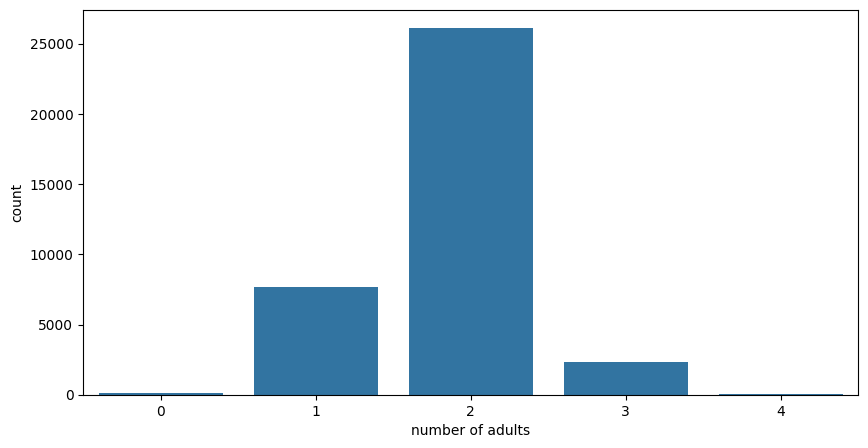

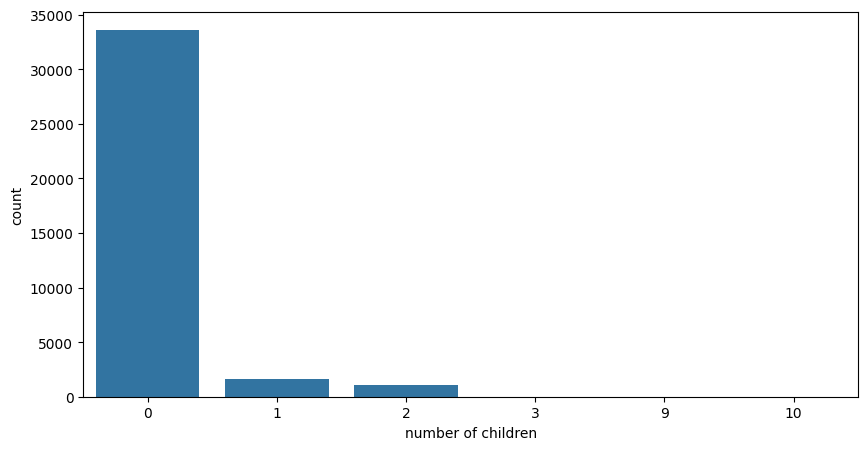

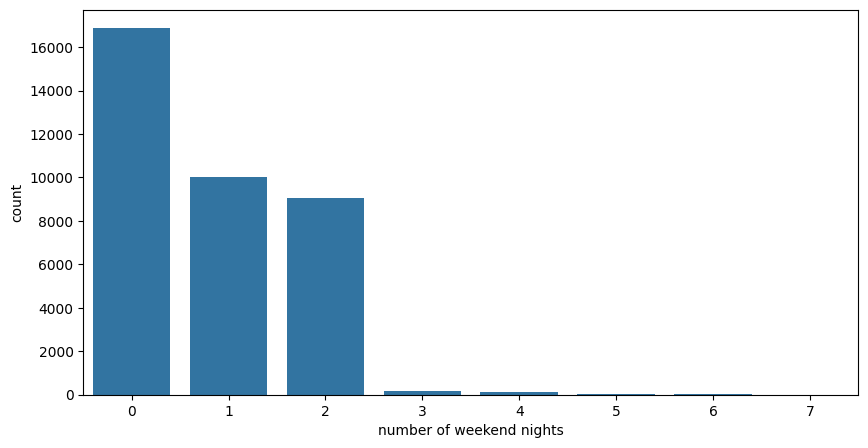

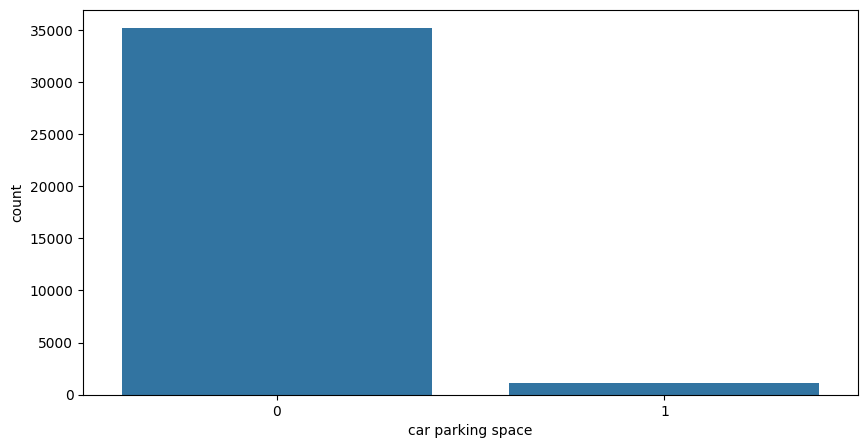

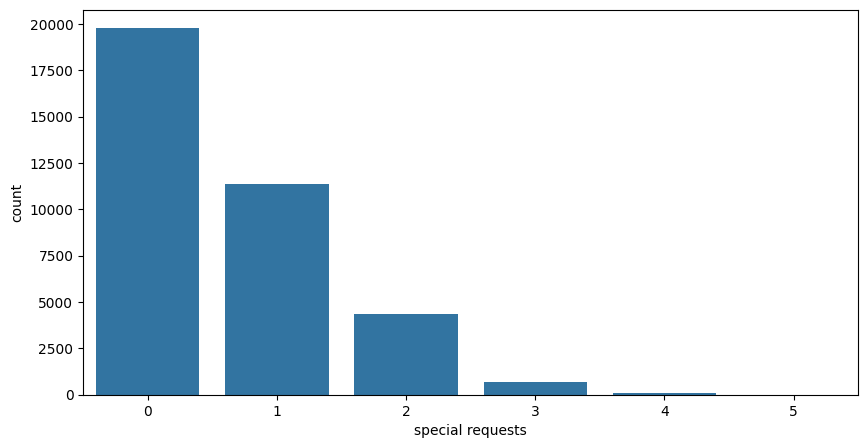

In [10]:
object_columns = df.drop('date of reservation', axis = 1).select_dtypes(include='category').columns
for col in object_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df)
    plt.show()

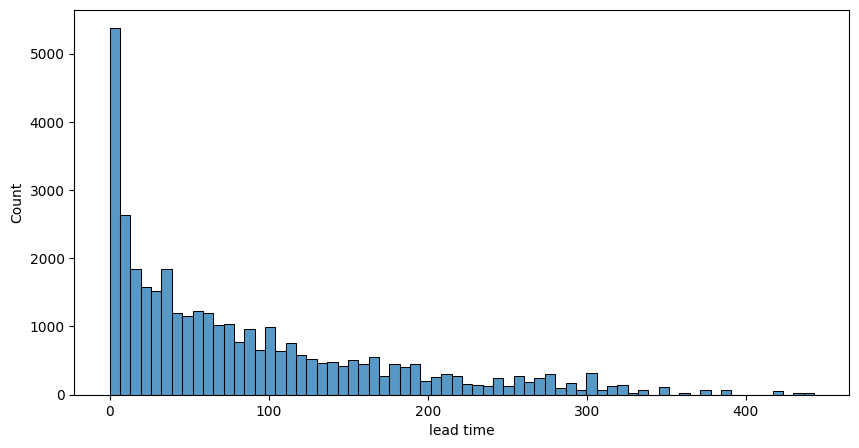

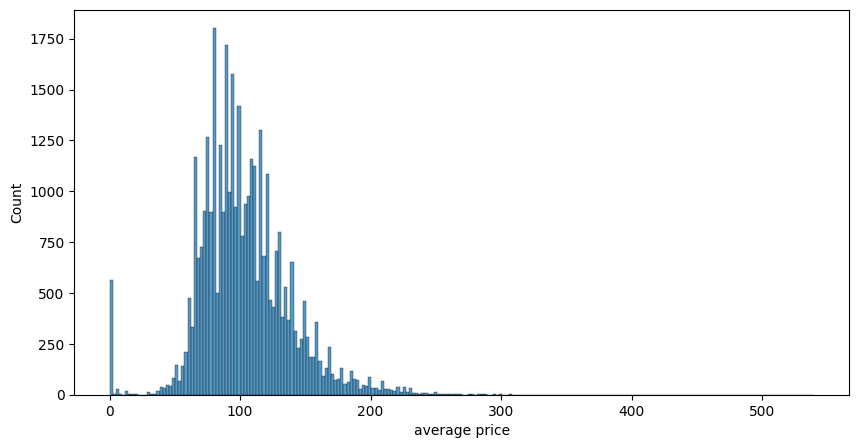

In [11]:
numeric_values = ['lead time', 'average price']
# Build Histogram using seaborn
for col in numeric_values:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col])
    plt.show()

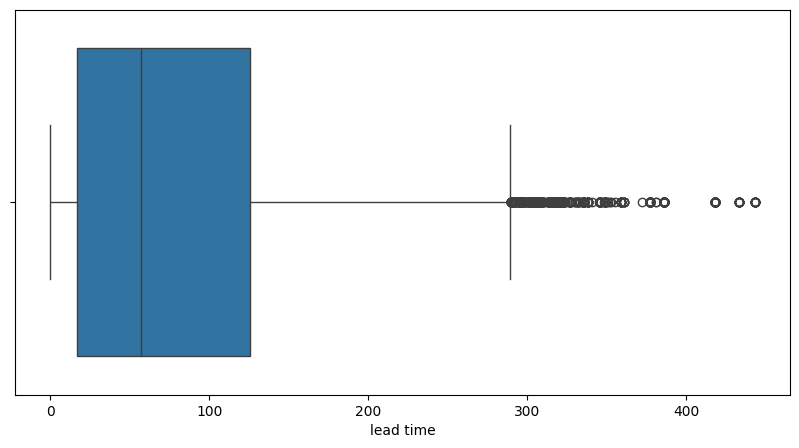

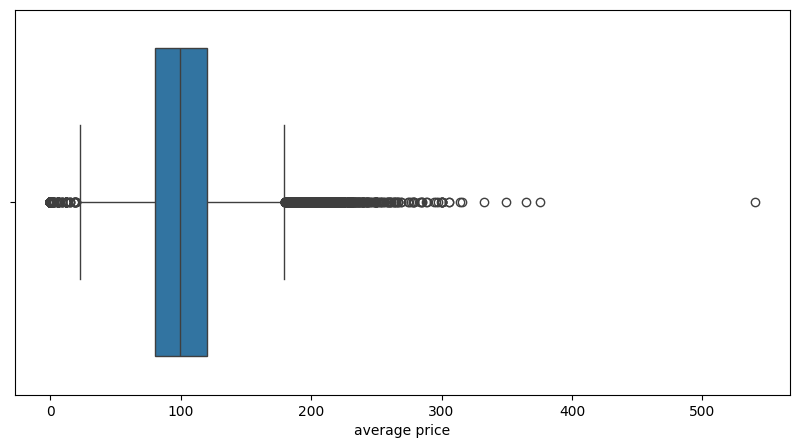

In [12]:
# Boxplot
for col in numeric_values:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[col], orient = 'h')
    plt.show()

In [15]:
# Handle outlier
for col in numeric_values:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[col] = df[col].clip(lower_bound, upper_bound)

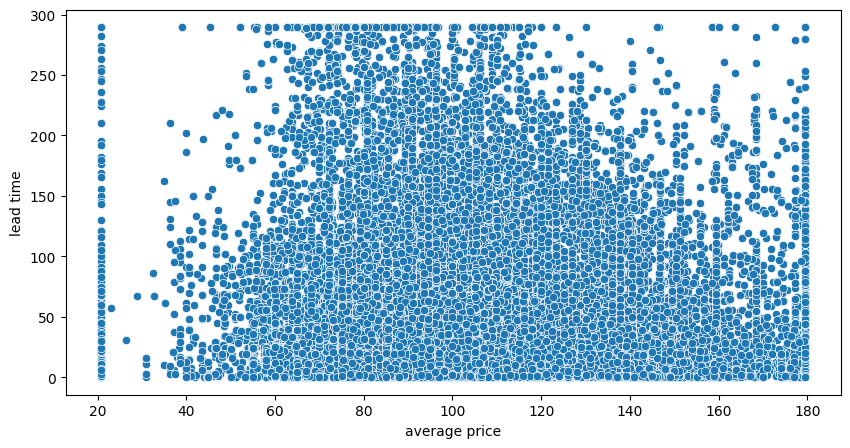

In [16]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='average price', y='lead time', data=df)
plt.show()

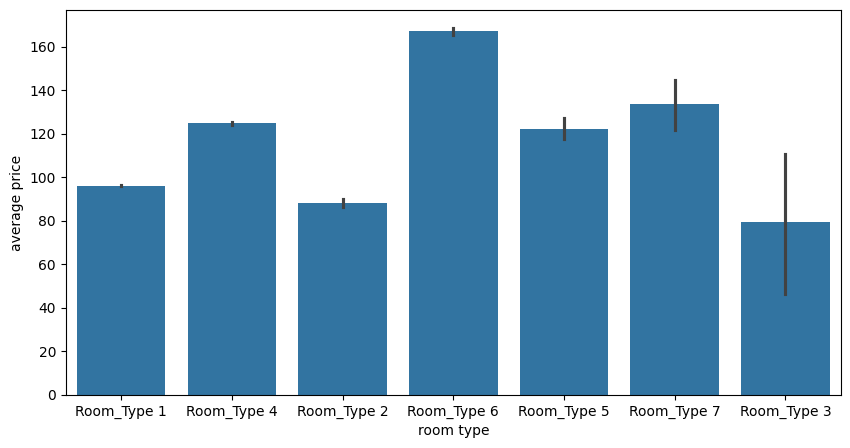

In [17]:
# plot bar chart between room type and average price
plt.figure(figsize=(10, 5))
sns.barplot(x='room type', y='average price', data=df)
plt.show()

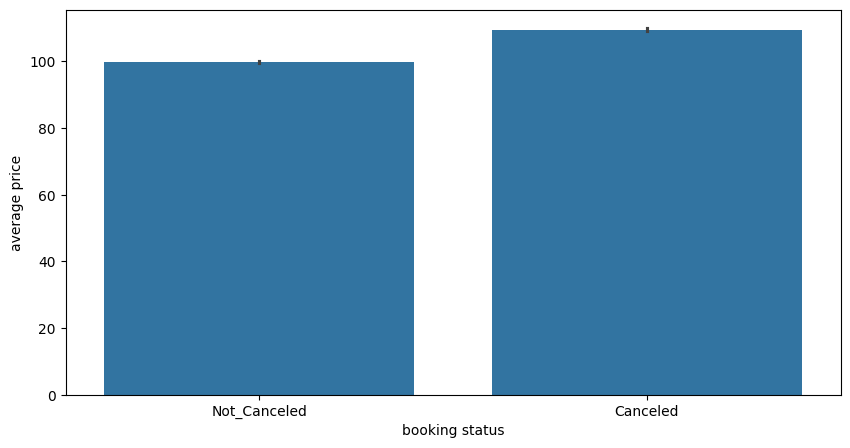

In [18]:
# plot bar chart between room type and average price
plt.figure(figsize=(10, 5))
sns.barplot(x='booking status', y='average price', data=df)
plt.show()

In [19]:
# fill missing data for numeric columns using mean
for col in numeric_values:
    df[col].fillna(df[col].mean(), inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29748\2097278067.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [20]:
# fill object_columns with mode
for col in object_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29748\4225143266.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [23]:
df.duplicated().sum()
df[col].mode()[0]
df.drop_duplicates(inplace=True)

In [26]:
# convert date of reservation to datetime
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')
# using parser ==>

In [27]:
df['month'] = df['date of reservation'].dt.month
df['year'] = df['date of reservation'].dt.year
df['day'] = df['date of reservation'].dt.day
df.drop('date of reservation', axis = 1, inplace = True)

In [28]:
df2 = df.copy()

In [29]:
object_columns = df.select_dtypes(include='object').columns
object_columns

Index(['type of meal', 'room type', 'market segment type', 'booking status'], dtype='object')

In [30]:
df[object_columns].nunique()

type of meal           4
room type              7
market segment type    5
booking status         2
dtype: int64

In [31]:
from category_encoders import BinaryEncoder
bc = BinaryEncoder(object_columns)
df = bc.fit_transform(df)

In [32]:
from category_encoders import OneHotEncoder
bc = OneHotEncoder(object_columns)
df = bc.fit_transform(df)

In [33]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


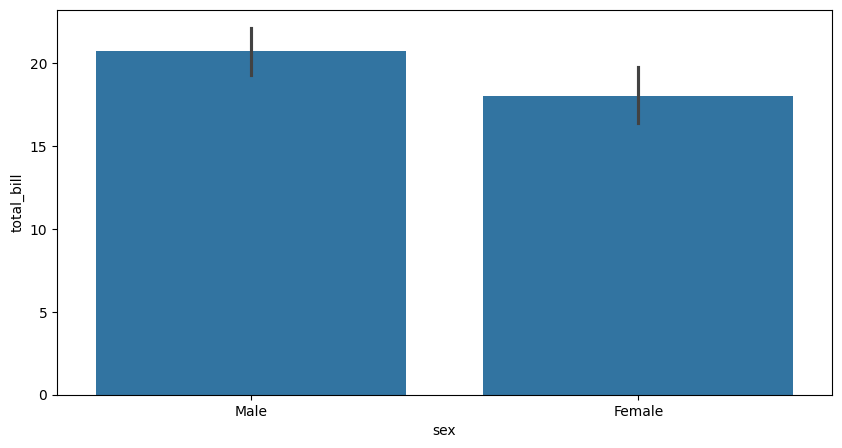

In [34]:
plt.figure(figsize=(10, 5))
sns.barplot(x='sex', y='total_bill', data=tips)
plt.show()